In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:10<00:00, 152MB/s]
100% 1.06G/1.06G [00:10<00:00, 104MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D,Flatten,BatchNormalization,Dropout

In [5]:
#generators -create batches
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
#creating CNN model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0,1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0,1))
model.add(Dense(1,activation='sigmoid')
)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 102ms/step - loss: 0.9936 - accuracy: 0.6484 - val_loss: 0.6665 - val_accuracy: 0.6678
Epoch 2/10
625/625 [==============================] - 66s 106ms/step - loss: 0.5262 - accuracy: 0.7441 - val_loss: 0.7977 - val_accuracy: 0.6386
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4509 - accuracy: 0.7904 - val_loss: 0.4769 - val_accuracy: 0.7770
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3826 - accuracy: 0.8269 - val_loss: 0.6336 - val_accuracy: 0.7052
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3140 - accuracy: 0.8616 - val_loss: 0.5429 - val_accuracy: 0.7538
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2425 - accuracy: 0.8941 - val_loss: 0.7312 - val_accuracy: 0.7860
Epoch 7/10
625/625 [==============================] - 66s 106ms/step - loss: 0.1855 - accuracy: 0.9229 - val_loss: 0.7493 - val_ac

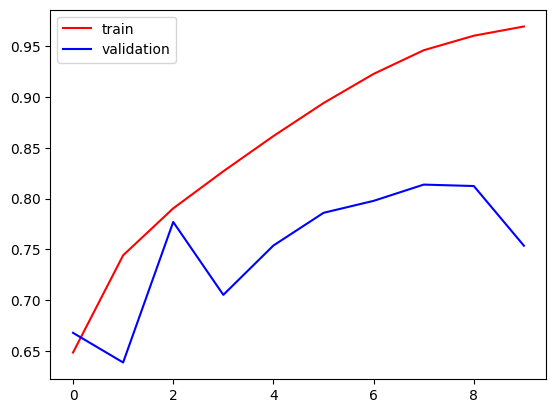

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

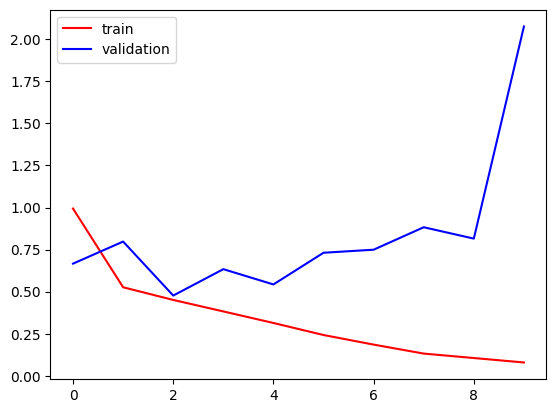

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [16]:
#need to reduce complexity

#add more data
#reducing complexity

In [17]:
import cv2

In [39]:
test_image = cv2.imread('/content/Cat.jpg')

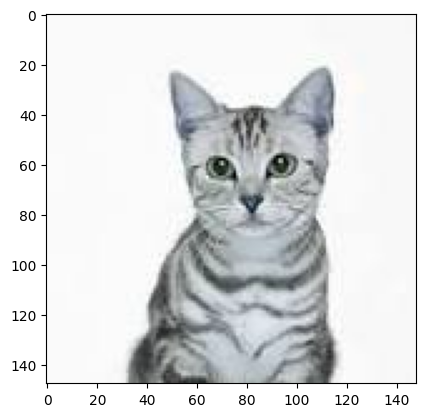

In [40]:
plt.imshow(test_image)

In [23]:
test_image.shape

(148, 148, 3)

In [24]:
test_image = cv2.resize(test_image,(256,256))

In [25]:
test_input = test_image.reshape(1,256,256,3)

In [26]:
model.predict(test_input)

1/1 [==============================] - 0s 373ms/step


array([[0.]], dtype=float32)

In [47]:
test_image = cv2.imread("/content/Dogg.jpg")

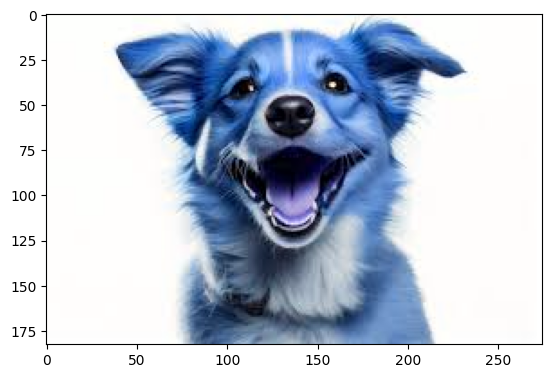

In [48]:
plt.imshow(test_image)

In [49]:
test_image.shape

(183, 275, 3)

In [50]:
test_image = cv2.resize(test_image,(256,256))

In [51]:
test_input = test_image.reshape(1,256,256,3)

In [52]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)